In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

from copy import deepcopy
from matplotlib.cm import get_cmap, ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from sklearn.metrics import r2_score
import sys

sys.path.append('..')
from data_utils import *

sys.path.append('../../DeLASE')
from delase import *
from parameter_choosing import *
from performance_metrics import *

# Load Data

In [3]:
chaotic_net_path = "/scratch2/weka/millerlab/eisenaj/DynamicalTrajectories/chaotic_net_data"

W = pd.read_pickle(os.path.join(chaotic_net_path, "W.pkl"))
lyaps = pd.read_pickle(os.path.join(chaotic_net_path, "lyaps_long.pkl"))
full_signals = pd.read_pickle(os.path.join(chaotic_net_path, "chaotic_net_signals_long.pkl"))

In [4]:
N = list(full_signals.values())[0].shape[2]
T = list(full_signals.values())[0].shape[1]
dt = 0.01

In [5]:
noise_sd = 0
# indices = np.random.choice(np. arange(N), size=(50,), replace=False)
indices = pd.read_pickle(os.path.join(chaotic_net_path, "indices.pkl"))
signals = {}
for key in full_signals.keys():
    signals[key] = full_signals[key][0][:, indices] + np.random.randn(T, len(indices))*noise_sd

# Test

In [8]:
window = 15000
p = 30
r_thresh = 0.25
lamb = 0.01

In [26]:
signals[1.2].mean()

0.00032664812181151315

In [24]:
signals[1.2].std()

0.4966291384509991

In [29]:
((signals[1.5] - signals[1.5].mean())/signals[1.5].std()).std()

1.0

In [18]:
%%time
# data = (data - data.mean())/data.std()
# data = (data - data.mean(axis=0))/data.std(axis=0)
# p = int(np.ceil(matrix_size/data.shape[1]))
data = signals[1.2]
data = (data - data.mean())/data.std()
delase = DeLASE(data[:window], p, use_torch=True, device='cuda')
delase.compute_havok_dmd(r_thresh=r_thresh, lamb=lamb)
delase.dt = dt
test_data = data[window:window + 5000]
ip_ret = compute_integrated_performance(delase, test_data, full_return=True, verbose=True)
delase.compute_jacobians()
delase.get_stability(max_freq=500, max_unstable_freq=125)

sig1_ip_ret = ip_ret
sig1_stab = delase.stability_params.cpu()
sig1_freqs = delase.stability_freqs.cpu()

  0%|          | 0/17 [00:00<?, ?it/s]

CPU times: user 9.86 s, sys: 414 ms, total: 10.3 s
Wall time: 11 s


In [30]:
%%time
i = 5000
# data = (data - data.mean())/data.std()
# data = (data - data.mean(axis=0))/data.std(axis=0)
# p = int(np.ceil(matrix_size/data.shape[1]))
data = signals[1.3]
data = (data - data.mean())/data.std()
delase = DeLASE(data[:window], p, use_torch=True, device='cuda')
delase.compute_havok_dmd(r_thresh=r_thresh, lamb=lamb)
delase.dt = dt
test_data = data[window:window + 5000]
ip_ret = compute_integrated_performance(delase, test_data, full_return=True, verbose=True)
delase.compute_jacobians()
delase.get_stability(max_freq=500, max_unstable_freq=125)

sig2_ip_ret = ip_ret
sig2_stab = delase.stability_params.cpu()
sig2_freqs = delase.stability_freqs.cpu()

  0%|          | 0/17 [00:00<?, ?it/s]

CPU times: user 10.9 s, sys: 1.46 s, total: 12.3 s
Wall time: 17.1 s


In [33]:
sig1_ip_ret['ip'], sig2_ip_ret['ip']

(0.7575245602726937, 0.7560468769073486)

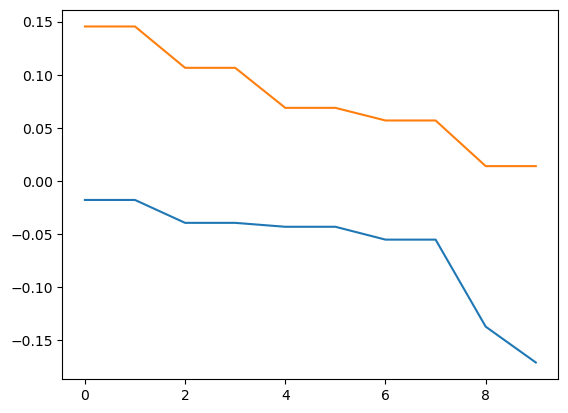

In [35]:
plt.plot(sig1_stab[:10])
plt.plot(sig2_stab[:10])